<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

Analysis over time - state and covid measures

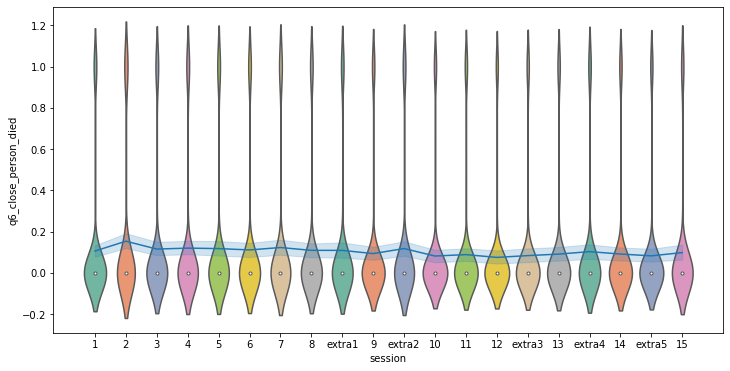

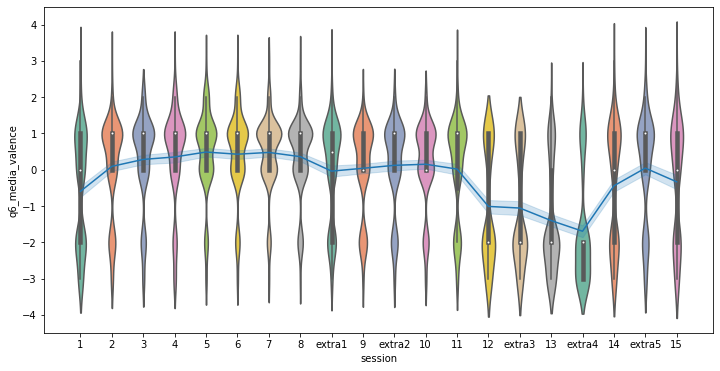

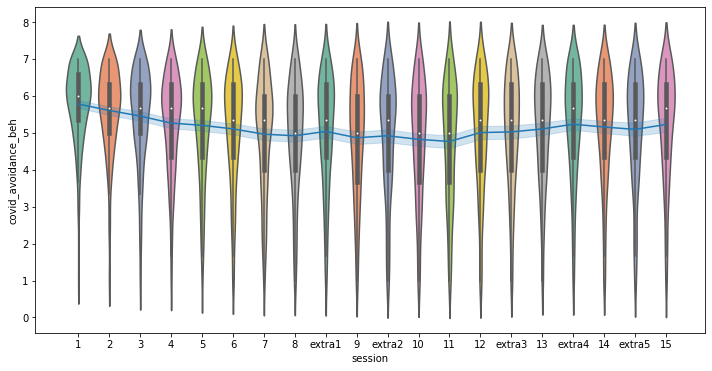

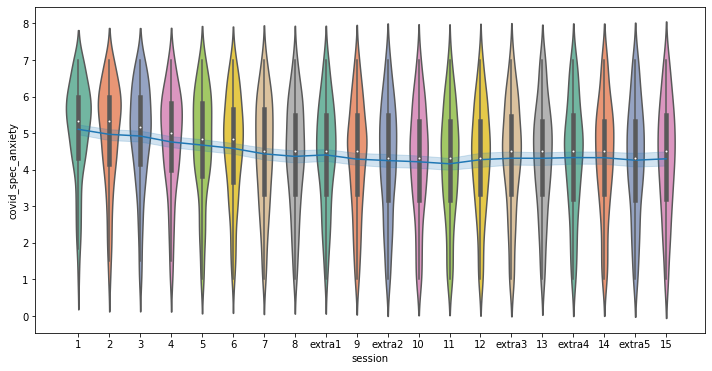

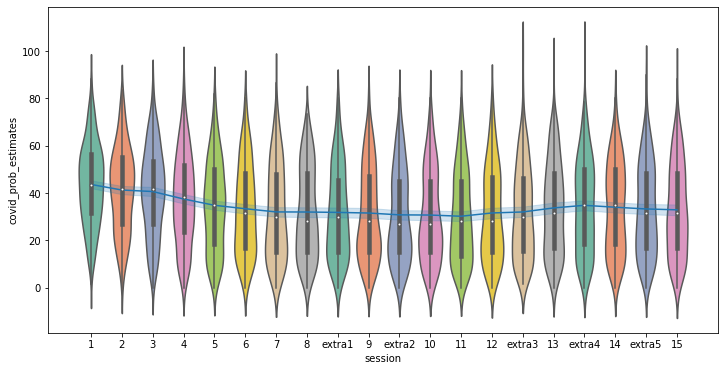

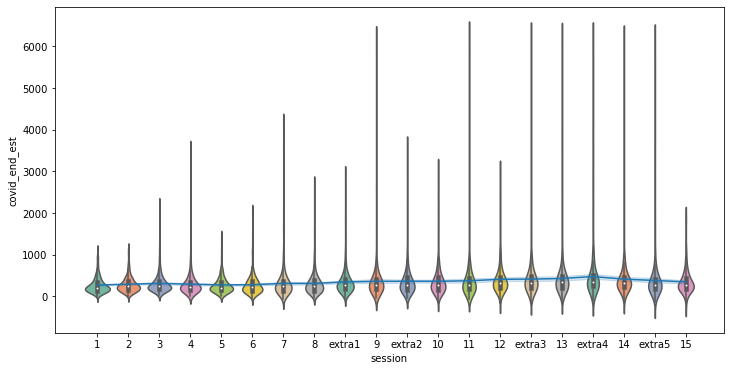

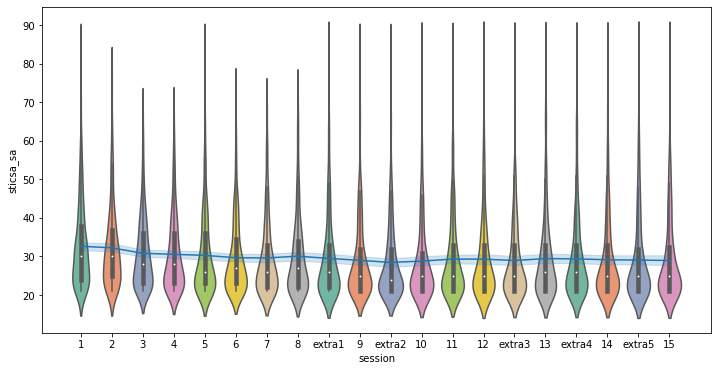

In [6]:
conf = {"sessions": ["1","2","3", "4","5", "6", "7","8","extra1", "9", "extra2", "10", "11", "12", "extra3", "13", "extra4", "14", "extra5", "15"],
        "questions": ["q6_me_inf", "q6_close_person_inf", "q6_close_person_died", "q6_media_valence",
"covid_worry", "covid_avoidance_beh", "covid_spec_anxiety", "covid_prob_estimates",  "covid_end_est", "sticsa_sa"]}

#conf["questions"] = ["q6_econ_impact_me","q6_econ_impact_closep","q6_work_home","q6_apply_soc_dist", "q6_risk_group", "q6_risk_group_closep","q6_houshold_membs", "q6_media_valence", 
#              "q7_worry_infected","q7_worry_die","q7_worry_econ_impact","q7_worry_sthg_bad","q7_worry_insuf_help", "q7_worry_closep_inf", "q7_closep_die","q7_worry_shortage",
#              "q7_period_rel_danger","q7_period_rel_safety", "q7_initial_surprise","q7_initial_scared","q7_people_overreact","q7_vir_not_as_dangerous","q7_vir_made_lab",
#              "q7_beh_wash_hands", "q7_beh_avoid_ppl", "q7_beh_avoid_public_places",
#              "q7_anx_touching_surf","q7_anx_stand_close_to_ppl","q7_anx_eating_food_out","q7_anx_public_transp", "q7_anx_visit_doc", "q7_anx_another_beh",
#              "q8_prob_inf_me", "q8_prob_die_me", "q8_prob_econ_imp_me", "q8_prob_inf_closep", "q8_prob_die_closep","q8_prob_inf_avgp",
#              "q8_t_pand_end_days","q8_t_life_back_norm_days","q8_t_secondw_when_days","q8_t_econ_back_norm_days"]   

p = pd.read_csv("../../data/session2/clean_dataset_reduced.csv")
sns.palplot(sns.color_palette("Set2"))
for q in conf["questions"]:
    df = pd.DataFrame()
    for ids, sess in enumerate(conf["sessions"]):
        
        if "extra" in sess:
            temp = pd.read_csv("../../data/extra_session"+sess[-1]+"/clean_dataset.csv")
        else:
            temp = pd.read_csv("../../data/session"+sess+"/clean_dataset.csv")
        temp["session"] = sess
        temp["sess_no"] = ids
        df = pd.concat([df, temp.loc[:,temp.columns.intersection(["session", "sess_no", q])]])
    df = df.dropna()
    fig =  plt.figure(figsize=(12,6))
    ax = plt.gca()
    #ax = sns.violinplot(x="session", y=q, data=df)
    
    bx = sns.violinplot(x="session", y=q, data=df, palette="Set2")
    #df["sess2"] = df["session"]-1
    ax = sns.lineplot(x="sess_no", y=q, data=df)



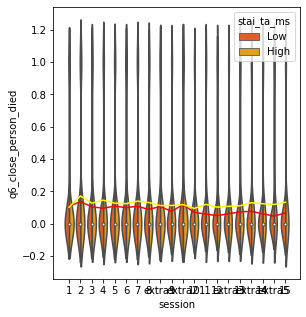

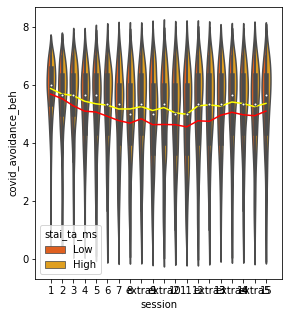

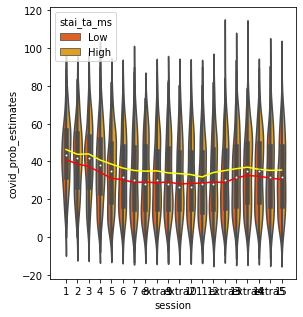

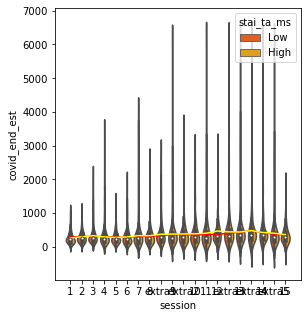

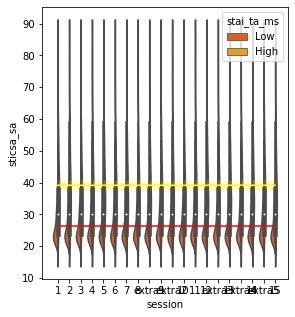

In [3]:
### Splits by anxiety
indif = pd.read_csv("../../data/session1/clean_dataset.csv")
indif = indif.loc[:,indif.columns.intersection(["PID",  "stai_ta", "stai_sa", "sticsa_ta", "sticsa_cog_ta", "sticsa_som_ta", "sticsa_sa", "sticsa_cog_sa", "sticsa_som_sa", "bdi", "cat"
])].set_index(["PID"])

ms_vars = ["stai_ta",  "sticsa_ta", "sticsa_cog_ta", "sticsa_som_ta", "bdi", "cat"]
## Do median split
for msv in ms_vars:
    me = indif[msv].median()
    indif[msv+"_ms"]= 1
    indif[msv+"_ms"][indif[msv]>me] = 2

indif=indif.drop(columns=ms_vars)
    
for q in conf["questions"]:    
    qdf = pd.DataFrame()
    for ids,sess in enumerate(conf["sessions"]):
  
           
        if "extra" in sess:
            temp = pd.read_csv("../../data/extra_session"+sess[-1]+"/clean_dataset.csv").set_index(["PROLIFICID"])
        else:
            temp = pd.read_csv("../../data/session"+sess+"/clean_dataset.csv").set_index(["PROLIFICID"])
        #temp["session"] = sess
        #temp["sess_no"] = ids
    
        df = pd.DataFrame()
        df = indif
        a = temp.loc[:,temp.columns.intersection([q])]

        df = df.join(a, rsuffix="2") 
        sqdf = pd.DataFrame()
        sqdf = pd.concat([sqdf, df.loc[:,df.columns.intersection([q, "stai_ta_ms",  "sticsa_ta_ms", "sticsa_cog_ta_ms", "sticsa_som_ta_ms", "bdi_ms", "cat_ms"])]])
        sqdf["session"] = sess
        sqdf["sess_no"] = ids
        qdf = pd.concat([qdf, sqdf])
    
    #toplot =["sticsa_ta_ms", "sticsa_cog_ta_ms", "sticsa_som_ta_ms"];
    toplot = ["stai_ta_ms"]
    fig =  plt.figure(figsize=(15,5))
    #qdf=qdf.loc[qdf.GROUP=="UK",:]
    for idx, i in enumerate(toplot):
        plt.subplot(1,3,idx+1)
        ax = plt.gca()
        #ax = sns.violinplot(x="session", y=q, data=df)
        
        ax = sns.violinplot(x="session", y=q, data=qdf, hue=i, split=True, palette="autumn")
        #qdf["sess2"] = qdf["session"]-1
        ax = sns.lineplot(x="sess_no", y=q, data=qdf, hue=i, palette="autumn", legend=False)
        new_labels = ['Low', 'High']
        leg=ax.axes.get_legend()
        leg.set_title(i)
        for t, l in zip(leg.texts, new_labels): t.set_text(l)
        #sns.plt.show()
        #for t, l in zip(ax.axes, new_labels): t.set_text(l)
    
        #sns.plt.show()

    
    
        


Index(['GROUP', 'stai_sa', 'sticsa_sa', 'sticsa_cog_sa', 'sticsa_som_sa',
       'stai_ta_ms', 'sticsa_ta_ms', 'sticsa_cog_ta_ms', 'sticsa_som_ta_ms',
       'bdi_ms', 'cat_ms'],
      dtype='object')


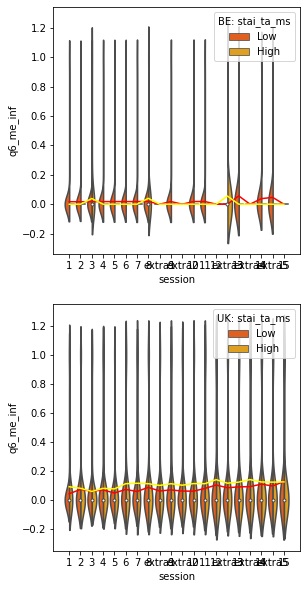

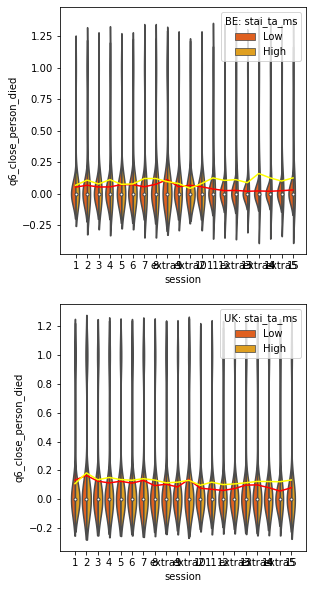

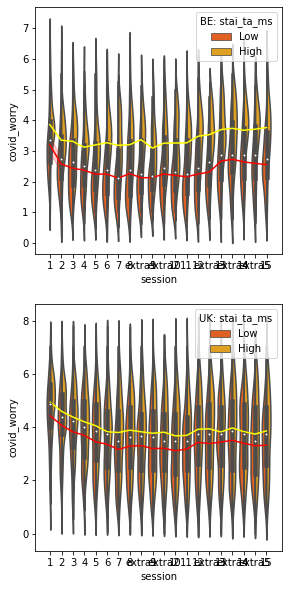

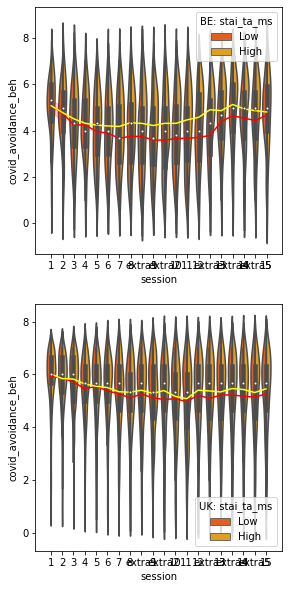

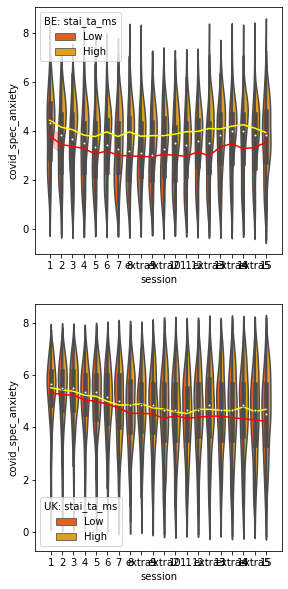

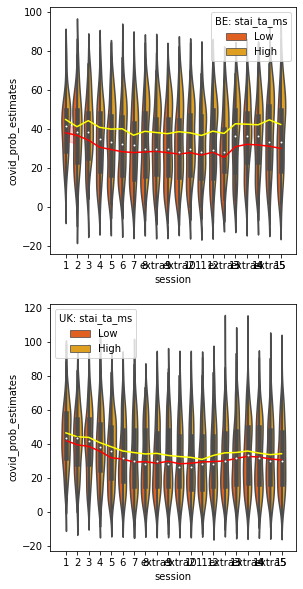

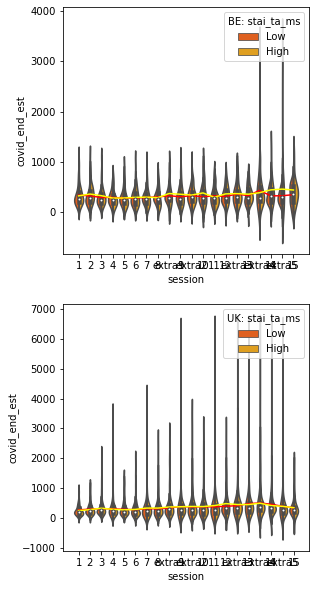

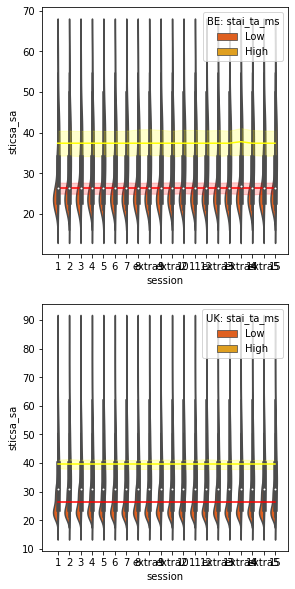

In [4]:
### Splits by anxiety & Country 
indif = pd.read_csv("../../data/session1/clean_dataset.csv")
indif = indif.loc[:,indif.columns.intersection(["PID", "GROUP",  "stai_ta", "stai_sa", "sticsa_ta", "sticsa_cog_ta", "sticsa_som_ta", "sticsa_sa", "sticsa_cog_sa", "sticsa_som_sa", "bdi", "cat"
])].set_index(["PID"])

ms_vars = ["stai_ta",  "sticsa_ta", "sticsa_cog_ta", "sticsa_som_ta", "bdi", "cat"]
## Do median split
for msv in ms_vars:
    me = indif[msv].median()
    indif[msv+"_ms"]= 1
    indif[msv+"_ms"][indif[msv]>me] = 2

indif=indif.drop(columns=ms_vars)
print(indif.columns)
for q in conf["questions"]:    
    qdf = pd.DataFrame()
    for ids,sess in enumerate(conf["sessions"]):
  
        if "extra" in sess:
            temp = pd.read_csv("../../data/extra_session"+sess[-1]+"/clean_dataset.csv").set_index(["PROLIFICID"])
        else:
            temp = pd.read_csv("../../data/session"+sess+"/clean_dataset.csv").set_index(["PROLIFICID"])
            
        df = pd.DataFrame()
        df = indif
        a = temp.loc[:,temp.columns.intersection([q, "GROUP"])]

        df = df.join(a, rsuffix="2") 
        sqdf = pd.DataFrame()
        sqdf = pd.concat([sqdf, df.loc[:,df.columns.intersection([q, "GROUP",  "stai_ta_ms",  "sticsa_ta_ms", "sticsa_cog_ta_ms", "sticsa_som_ta_ms", "bdi_ms", "cat_ms"])]])
        sqdf["session"] = sess
        sqdf["sess_no"] = ids
        qdf = pd.concat([qdf, sqdf])
    
    #toplot =["sticsa_ta_ms", "sticsa_cog_ta_ms", "sticsa_som_ta_ms"];
    toplot = ["stai_ta_ms"]
    fig =  plt.figure(figsize=(15,10))
    #print(qdf)
    countries = ["BE", "UK"]
    for idx, i in enumerate(toplot):
        for idx_c, ctry in enumerate(countries):
            plt.subplot(2,3,(idx+1)+idx_c*3  )
            ax = plt.gca()
            #ax = sns.violinplot(x="session", y=q, data=df)
            qdf_loc=qdf.loc[qdf.GROUP==ctry,:]
           #print(qdf_loc)
            ax = sns.violinplot(x="session", y=q, data=qdf_loc, hue=i, split=True, palette="autumn")
         #   qdf_loc["sess2"] = qdf_loc["session"]-1
            ax = sns.lineplot(x="sess_no", y=q, data=qdf_loc, hue=i, palette="autumn", legend=False)
            new_labels = ['Low', 'High']
            leg=ax.axes.get_legend()
            leg.set_title(ctry+": "+i )
            for t, l in zip(leg.texts, new_labels): t.set_text(l)